In [2]:
import pandas as pd 
import numpy as np
import os 

In [2]:
path ='../ground_truth/micro_training_MICCAI_challenge/'
# root_dirs = ['../micro_1', '../micro_2','../micro_3', '../micro_4', '../micro_5']
root_dirs = ['../micro_1', '../micro_2','../micro_3', '../micro_5']
data= None
count=0
ps1 = 'train0'
ps = 'train'

In [3]:
for root_dir in root_dirs:
    i = int(root_dir.split('_')[-1])
    i = 5*(i-1) + 1
    if i >= 10: ps = 'train'
    complete_list= [(ps if i >= 10 else ps1) +str(i),
                    (ps if i+1 >= 10 else ps1) +str(i+1),
                    (ps if i+2 >= 10 else ps1) +str(i+2),
                    (ps if i+3 >= 10 else ps1) +str(i+3),
                    (ps if i+4 >= 10 else ps1) +str(i+4)]
    for f in complete_list:
        csv_data = pd.read_csv(path+'/'+f+'.csv')
        csv_data['Frame']=[root_dir+'/'+f+'/'+str(suit)+'.jpg' for suit in csv_data['Frame'].as_matrix()]

        if count > 0:
            data=pd.concat([data,csv_data])
        else:
            data = csv_data
        count +=1

### Time to shuffle the concatenated data points.

#### Shuffling using pandas, done on uavws


In [4]:
data=data.sample(frac=1).reset_index(drop=True)

In [5]:
data

,Frame,to_be_evaluated,biomarker,Charleux cannula,hydrodissection cannula,Rycroft cannula,viscoelastic cannula,cotton,capsulorhexis cystotome,Bonn forceps,...,irrigation/aspiration handpiece,phacoemulsifier handpiece,vitrectomy handpiece,implant injector,primary incision knife,secondary incision knife,micromanipulator,suture needle,Mendez ring,Vannas scissors
0,../micro_2/train08/3131.jpg,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,../micro_3/train13/12455.jpg,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,../micro_5/train25/824.jpg,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,../micro_5/train25/31706.jpg,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,../micro_3/train14/18048.jpg,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,../micro_5/train25/37411.jpg,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,../micro_2/train10/105.jpg,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,../micro_5/train24/15114.jpg,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,../micro_5/train23/6214.jpg,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,../micro_2/train07/12542.jpg,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [6]:
data.shape

(365591, 23)

In [7]:
# data[:int(0.7*data.shape[0])].to_csv('combined_train.csv',index=False)
# data[int(0.7*data.shape[0]):int(0.7*data.shape[0])+int(0.15*data.shape[0])].to_csv('combined_valid.csv',index=False)
# data[int(0.7*data.shape[0])+int(0.15*data.shape[0]):].to_csv('combined_test.csv',index=False)


data[:int(0.7*data.shape[0])].to_csv('one_to_four_combined_train.csv',index=False)
data[int(0.7*data.shape[0]):].to_csv('one_to_four_combined_valid.csv',index=False)


In [8]:
COLUMN_NAMES = data.columns.values
COLUMN_NAMES

array(['Frame', 'to_be_evaluated', 'biomarker', 'Charleux cannula',
       'hydrodissection cannula', 'Rycroft cannula',
       'viscoelastic cannula', 'cotton', 'capsulorhexis cystotome',
       'Bonn forceps', 'capsulorhexis forceps', 'Troutman forceps',
       'needle holder', 'irrigation/aspiration handpiece',
       'phacoemulsifier handpiece', 'vitrectomy handpiece',
       'implant injector', 'primary incision knife',
       'secondary incision knife', 'micromanipulator', 'suture needle',
       'Mendez ring', 'Vannas scissors'], dtype=object)

In [9]:
os = []
train = pd.read_csv('one_to_four_combined_train.csv').as_matrix()
print (train.shape)
head  = pd.read_csv('one_to_four_combined_train.csv').columns.values

a = np.array(np.sum(train[:, 2:], 1), dtype= 'int')
hist = np.array(np.sum(train[:, 2:], 0), dtype = 'int')

min_occ = 5200
t = hist<min_occ
t = np.insert(t, False, 0)
t = np.insert(t, False, 0)

print (t)
d = train[a < 2]
for i in np.where(t)[0]:
    print (d[d[:, i] == True].shape) # bio
    m = min_occ//d[d[:, i] == True].shape[0]
    print (len(list(d[d[:, i] == True])*m))
    os.extend(list(d[d[:, i] == True])*m)
    
os = np.array(os)
df = pd.DataFrame(os, columns=COLUMN_NAMES)

train = pd.concat([pd.read_csv('one_to_four_combined_train.csv'), df])
print (train.shape)

(255913, 23)


/home/bmi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: in the future insert will treat boolean arrays and array-likes as a boolean index instead of casting it to integer
  # This is added back by InteractiveShellApp.init_path()
/home/bmi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: in the future insert will treat boolean arrays and array-likes as a boolean index instead of casting it to integer
  if sys.path[0] == '':


[False False  True  True  True False False  True False  True False  True
  True False False  True  True  True  True False  True  True  True]
(62, 23)
5146
(2208, 23)
4416
(4484, 23)
4484
(2566, 23)
5132
(443, 23)
4873
(477, 23)
4770
(132, 23)
5148
(0, 23)


ZeroDivisionError: integer division or modulo by zero

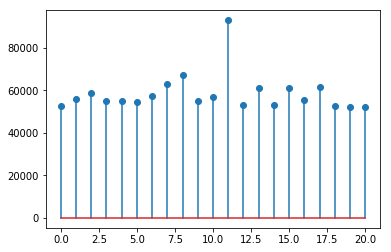

In [5]:
train = pd.read_csv('/media/bmi/Varghese1/bla/cataracts-2018-train/codes/catract2018/oversampled_train.csv')
csv= train.as_matrix()
hist1 = np.sum(csv[:,2:],0)

import matplotlib.pyplot as plt
plt.stem(hist1)
plt.show()

In [ ]:
train.to_csv('oversampled_train.csv', index = False)

In [ ]:
count=np.zeros((3,21))
count[0]=np.sort(hist1)
count[1]=np.sort(hist2)
count[2]=np.sort(hist3)

In [ ]:
list(count.T)

In [ ]:
np.ones(500000, dtype='float')